<a href="https://colab.research.google.com/github/Shallom12/Autonomous-driving-of-Chungnam-Human-Resources-Development-Institute/blob/main/day3_lab_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: 재귀적 DFS vs. 반복적 BFS

**목표:**
1.  깊이 우선 탐색(DFS)을 **재귀(Recursion)**를 사용하여 구현합니다.
2.  너비 우선 탐색(BFS)을 **반복문과 큐(Queue)**를 사용하여 구현합니다.
3.  두 알고리즘의 탐색 패턴을 시각화하여 프로그래밍 패러다임과 데이터 구조의 차이가 어떤 결과를 낳는지 직접 확인합니다.

**핵심 개념:** 재귀(콜 스택)와 반복(명시적 큐)은 문제를 해결하는 두 가지 다른 접근 방식이며, 이는 알고리즘의 근본적인 동작을 결정합니다.

In [ ]:
#%title: 필요한 라이브러리 임포트 및 그리드 설정

import matplotlib.pyplot as plt

# 그리드 설정 (0: 길, 1: 벽)
grid = [
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
    [1, 1, 1, 0, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 1, 0]
]

start = (0, 0)
goal = (9, 9)

# 시각화 헬퍼 함수 (이전과 동일)
def visualize_search(grid, visited_nodes, title):
    plt.figure(figsize=(8, 8))
    plt.imshow(grid, cmap='Greys', interpolation='none')
    plt.plot(start[1], start[0], 'bs', markersize=12, label='Start')
    plt.plot(goal[1], goal[0], 'g*', markersize=16, label='Goal')
    if visited_nodes:
        for i, node in enumerate(visited_nodes):
            plt.plot(node[1], node[0], 'r.', markersize=6, alpha=(i+1)/len(visited_nodes))
    plt.title(title, fontsize=16)
    plt.legend()
    plt.xticks([])
    plt.yticks([])
    plt.show()


### 과제 1: 재귀를 이용한 깊이 우선 탐색 (DFS)
`dfs_recursive` 함수를 완성하세요. 이 함수는 자기 자신을 호출하여 이웃 노드를 탐색해야 합니다.
- **Base Case (종료 조건):** 현재 노드가 목표이거나, 벽이거나, 이미 방문한 곳이면 탐색을 중단해야 합니다.
- **Recursive Step (재귀 단계):** 유효한 이웃 노드에 대해 `dfs_recursive` 함수를 다시 호출합니다.

DFS가 탐색한 노드 개수: 0


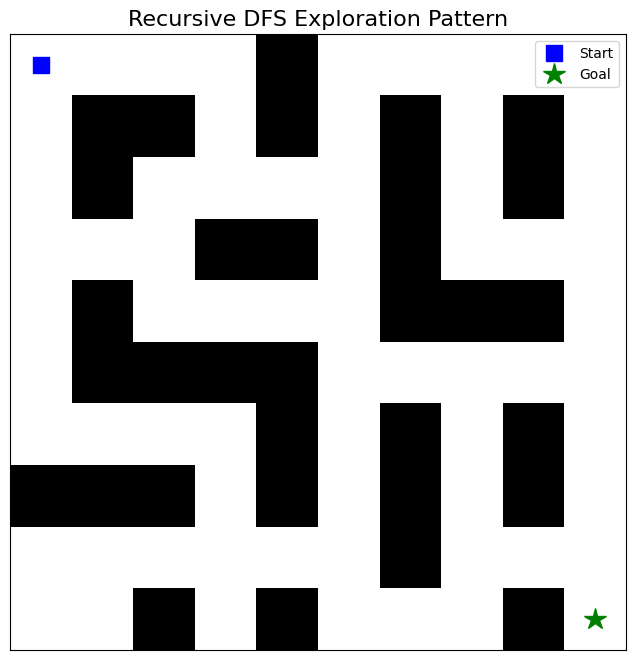

In [ ]:
#@title: 재귀적 DFS 구현

def dfs_recursive_helper(grid, current, goal, visited, path_order):
    rows, cols = len(grid), len(grid[0])
    row, col = current

    # 종료 조건 1: 그리드 밖이거나 벽인 경우

    # 종료 조건 2: 이미 방문한 경우

    # 현재 노드 방문 처리

    # 종료 조건 3: 목표 도달

    # 재귀 단계: 4방향 이웃에 대해 재귀 호출

# DFS 실행을 위한 래퍼 함수
def run_dfs(grid, start, goal):
    visited = set()
    path_order = []
    dfs_recursive_helper(grid, start, goal, visited, path_order)
    return path_order

# 실행 및 시각화
dfs_path = run_dfs(grid, start, goal)
print(f"DFS가 탐색한 노드 개수: {len(dfs_path)}")
visualize_search(grid, dfs_path, "Recursive DFS Exploration Pattern")

### 과제 2: 반복문과 큐를 이용한 너비 우선 탐색 (BFS)
bfs_iterative 함수를 완성하세요. while 반복문과 큐(Python 리스트의 pop(0) 사용)를 이용하여 구현합니다.

BFS가 탐색한 노드 개수: 67


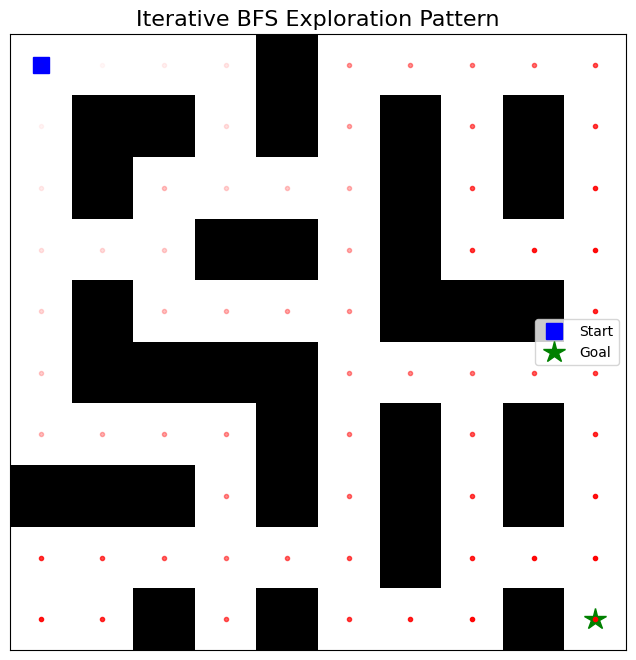

In [ ]:
# 반복적 BFS 구현

from collections import deque

def bfs_iterative(grid, start, goal):
    rows, cols = len(grid), len(grid[0])

    # 큐(Queue)로 사용할 리스트
    queue = deque([start])
    # 방문한 노드를 기록
    visited = {start}
    # 탐색 순서 기록
    path_order = [start]

    while queue:
        # 큐의 맨 앞에서 노드를 꺼냄 (FIFO)
        current = queue.popleft()

        # 목표 도달 시 종료
        if current == goal:
            return path_order

        # 4방향 이웃 노드 탐색 (상, 하, 좌, 우)
        for dr, dc in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            neighbor_row, neighbor_col = current[0] + dr, current[1] + dc
            neighbor = (neighbor_row, neighbor_col)

            # 유효성 검사: 그리드 범위 내, 벽이 아니고, 방문하지 않은 노드
            if 0 <= neighbor_row < rows and 0 <= neighbor_col < cols and \
               grid[neighbor_row][neighbor_col] == 0 and neighbor not in visited:

                visited.add(neighbor)
                queue.append(neighbor)
                path_order.append(neighbor)

    return path_order

# 실행 및 시각화
bfs_path = bfs_iterative(grid, start, goal)
print(f"BFS가 탐색한 노드 개수: {len(bfs_path)}")
visualize_search(grid, bfs_path, "Iterative BFS Exploration Pattern")

# Lab 2: 벨만-포드 알고리즘과 동적 프로그래밍

**목표:**
1.  동적 프로그래밍의 바텀업(Bottom-up) 접근법인 벨만-포드 알고리즘을 구현합니다.
2.  '반복적 완화(Iterative Relaxation)' 과정을 통해, 지역적 정보만으로 어떻게 전역 최적 해가 계산되는지 확인합니다.

**핵심 개념:** 이 실습은 강의에서 배운 벨만 방정식의 재귀적 관계를 반복문을 통해 푸는 과정입니다. 각 반복은 경로의 길이를 하나씩 늘려가며 최적 비용을 찾아가는 동적 프로그래밍 테이블을 채우는 것과 같습니다.

In [ ]:
# 그래프 정의

# 인터넷 라우터 네트워크를 시뮬레이션한다고 가정합니다.
# 각 엣지는 (출발 노드, 도착 노드, 비용) 형태의 튜플입니다.
num_vertices = 5
edges = [
    (0, 1, -1),
    (0, 2, 4),
    (1, 2, 3),
    (1, 3, 2),
    (1, 4, 2),
    (3, 2, 5),
    (3, 1, 1),
    (4, 3, -3)
]
source_node = 0

### 벨만-포드 알고리즘 구현
알고리즘의 핵심은 두 개의 중첩된 `for` 반복문입니다.
1. 바깥 루프는 `V-1` 번 반복하여 정보가 네트워크 전체에 전파될 시간을 보장합니다.
2. 안쪽 루프는 모든 엣지를 순회하며 '완화(relaxation)' 조건을 확인하고, 더 저렴한 경로를 발견하면 비용을 갱신합니다.

In [ ]:
# 벨만-포드 함수 구현 및 실행

import sys

def bellman_ford(edges, num_v, source):
    # 1. 거리 초기화
    # 시작 노드를 제외한 모든 노드의 거리를 무한대로 설정
    distances = [float(sys.maxsize)] * num_v
    distances[source] = 0

    # 2. V-1 번 반복하며 엣지 완화
    for i in range(num_v - 1):
        print(f"--- 반복 {i+1} ---")
        # [문제] 모든 엣지에 대해 반복
        for u, v, w in edges:
            # 문제] 만약 노드 u까지의 현재 거리가 무한대가 아니고, 노드 u까지의 거리에 u에서 v로 가는 엣지의 가중치 w를 더한 값이 노드 v까지의 현재 거리보다 작다면
            if distances[u] != float(sys.maxsize) and distances[u] + w < distances[v]:
                print(f"  (엣지 {u}->{v}) 노드 {v}의 거리 갱신: {distances[v]:.2f} -> {distances[u] + w:.2f}")
                # 문제]  노드 v까지의 최단 거리를 이 새로운, 더 짧은 거리로 업데이트하라
                distances[v] = distances[u] + w
        print(f"  현재 거리: {[f'{d:.2f}' for d in distances]}")

    return distances

# 벨만-포드 알고리즘 실행
shortest_distances = bellman_ford(edges, num_vertices, source_node)

print("\n--- 최종 결과 ---")
for i, dist in enumerate(shortest_distances):
    print(f"시작 노드 {source_node}에서 노드 {i}까지의 최단 거리: {dist}")

--- 반복 1 ---
  (엣지 0->1) 노드 1의 거리 갱신: 9223372036854775808.00 -> -1.00
  (엣지 0->2) 노드 2의 거리 갱신: 9223372036854775808.00 -> 4.00
  (엣지 1->2) 노드 2의 거리 갱신: 4.00 -> 2.00
  (엣지 1->3) 노드 3의 거리 갱신: 9223372036854775808.00 -> 1.00
  (엣지 1->4) 노드 4의 거리 갱신: 9223372036854775808.00 -> 1.00
  (엣지 4->3) 노드 3의 거리 갱신: 1.00 -> -2.00
  현재 거리: ['0.00', '-1.00', '2.00', '-2.00', '1.00']
--- 반복 2 ---
  현재 거리: ['0.00', '-1.00', '2.00', '-2.00', '1.00']
--- 반복 3 ---
  현재 거리: ['0.00', '-1.00', '2.00', '-2.00', '1.00']
--- 반복 4 ---
  현재 거리: ['0.00', '-1.00', '2.00', '-2.00', '1.00']

--- 최종 결과 ---
시작 노드 0에서 노드 0까지의 최단 거리: 0
시작 노드 0에서 노드 1까지의 최단 거리: -1
시작 노드 0에서 노드 2까지의 최단 거리: 2
시작 노드 0에서 노드 3까지의 최단 거리: -2
시작 노드 0에서 노드 4까지의 최단 거리: 1


# Lab 3: 학습된 정책(Policy) 실행하기

**목표:**
1.  강화학습의 최종 결과물인 '정책'이 무엇인지 이해합니다.
2.  에이전트가 이 정책을 어떻게 사용하여 목표까지 이동하는지 시뮬레이션합니다.

**핵심 개념:** 강의에서 배운 Q-러닝과 같은 복잡한 학습 과정의 결과는, 결국 '각 상태(위치)에서 어떤 행동을 해야 하는가'를 알려주는 이 간단한 화살표 지도(규칙)로 귀결됩니다. 우리는 이 '뇌'를 직접 실행해봅니다.

In [ ]:
# 학습된 정책과 환경 설정

# 강화학습을 통해 이미 학습이 완료된 최적 정책이라고 가정합니다.
policy_grid = [
    ['>', '>', '>', 'v', '#'],
    ['^', '#', '>', 'v', '#'],
    ['^', '#', '>', 'v', 'G'],
    ['^', '<', '<', '<', '<'],
]

start_pos = (3, 0)


### 정책 실행 시뮬레이터 구현
간단한 `while` 반복문을 사용하여, 에이전트가 현재 위치의 정책을 읽고 다음 위치로 이동하는 과정을 목표에 도달할 때까지 반복합니다.

경로를 찾지 못했거나 너무 오래 걸렸습니다.

--- 에이전트의 이동 경로 ---
(3, 0) -> (3, 0) -> (3, 0) -> (3, 0) -> (3, 0) -> (3, 0) -> (3, 0) -> (3, 0) -> (3, 0) -> (3, 0) -> (3, 0) -> (3, 0) -> (3, 0) -> (3, 0) -> (3, 0) -> (3, 0) -> (3, 0) -> (3, 0) -> (3, 0) -> (3, 0) -> (3, 0)


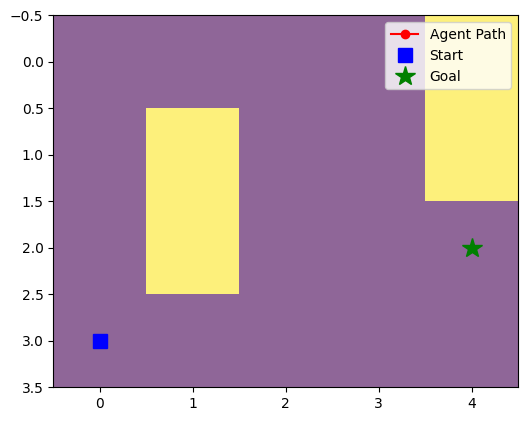

In [ ]:
# 정책 실행 시뮬레이터 구현 및 실행

def execute_policy(policy, start):
    row, col = start
    path = [(row, col)]

    # 최대 20번만 이동하도록 제한 (무한 루프 방지)
    for _ in range(20):
        # [문제] 현재 에이전트가 있는 위치의 정책(가야 할 방향)을 확인합니다.

        # [문제] 만약 현재 위치가 'G' (목표 지점)이면
            # [문제] "목표 도달!" 이라고 출력하고
            # [문제] 지금까지 지나온 길(경로)을 반환하고 함수를 끝냅니다.

        # [문제] 만약 정책이 '>' (오른쪽)이면, 오른쪽으로 한 칸 이동합니다.
        # [문제] 아니면 만약 정책이 '<' (왼쪽)이면, 왼쪽으로 한 칸 이동합니다.
        # [문제] 아니면 만약 정책이 'v' (아래쪽)이면, 아래쪽으로 한 칸 이동합니다.
        # [문제] 그 외에 만약 정책이 '^' (위쪽)이면, # 위쪽으로 한 칸 이동합니다.

        path.append((row, col))

    print("경로를 찾지 못했거나 너무 오래 걸렸습니다.")
    return path

# 정책 실행
agent_path = execute_policy(policy_grid, start_pos)

print("\n--- 에이전트의 이동 경로 ---")
print(" -> ".join(map(str, agent_path)))

# (선택) 경로를 간단하게 시각화
import numpy as np
import matplotlib.pyplot as plt

grid_for_viz = np.zeros((len(policy_grid), len(policy_grid[0])))
goal_pos = None
for r in range(len(policy_grid)):
    for c in range(len(policy_grid[0])):
        if policy_grid[r][c] == '#': grid_for_viz[r, c] = 0.5
        if policy_grid[r][c] == 'G': goal_pos = (r, c)

plt.figure(figsize=(6,5))
plt.imshow(grid_for_viz, cmap='viridis', alpha=0.6)
path_rows = [p[0] for p in agent_path]
path_cols = [p[1] for p in agent_path]
plt.plot(path_cols, path_rows, 'r-o', label='Agent Path')
plt.plot(start_pos[1], start_pos[0], 'bs', markersize=10, label='Start')
if goal_pos:
    plt.plot(goal_pos[1], goal_pos[0], 'g*', markersize=15, label='Goal')
plt.legend()
plt.show()